**Goal: Predicting Customer Churn for Vodafone

Hypothesis
1.Increases in monthly charges causes customers to churn
2.Customers with multiple lines are less likely to churn
3.Tech support for customers reduces churn rate for categories such as females and senior citizens

Questions
 1. what is the chrun rate by:
i. Payment method
ii. Gender
iii. Patner Status
iv. Number of Dependents
 2. Does increase in monthly charges influence:
 a. churn rate by citizenship?
 b. churn rate paperless vs. non- paperless?
 3. Which internet  service customers churn the most?
 4. Does tech support influence customer churn in any way and by how much?


1.0 Importing Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
# Normalization
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, fbeta_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Testing Features
from sklearn.feature_selection import SelectFromModel
# Cross Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  RandomizedSearchCV


1.1 Loading and Exploring the dataset

In [3]:
data =pd.read_csv("C:/Users/HP/Documents/Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# previewing unique columns
unique_patner_status =(data.loc[:,'Partner']).value_counts()
unique_patner_status

No     3641
Yes    3402
Name: Partner, dtype: int64

In [6]:
unique_dependent_numbers =(data.loc[:,'Dependents']).value_counts()
unique_dependent_numbers

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [7]:
unique_SeniorCitizen_numbers =(data.loc[:,'SeniorCitizen']).value_counts()
unique_SeniorCitizen_numbers

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

1.2 Data Cleaning and Preprocessing

In [8]:
#convert totalcharges column to datatype; float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
print (data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


1.3 Pandas Profiling

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# dropping duplicates
data.drop_duplicates(inplace =True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
# dealing with missing cells
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['TotalCharges']])
data['TotalCharges'] = imputer.transform(data[['TotalCharges']])

In [13]:
#checking for changes
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#Encoding data for some columns  by replacing categorical values by 0 & 1
#converting into binary integers
data = data.copy()
columns1 = ['Partner','Dependents','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','PhoneService']
for i in columns1:
    data[i]=data[i].replace(['Yes', 'No'], [0,1])
       

            

In [15]:
data['gender']=data['gender'].replace({'Male':0, 'Female':1})

In [16]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,1,1,No phone service,DSL,1,...,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,1
1,5575-GNVDE,0,0,1,1,34,0,No,DSL,0,...,0,1,1,1,One year,1,Mailed check,56.95,1889.50,1
2,3668-QPYBK,0,0,1,1,2,0,No,DSL,0,...,1,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,0
3,7795-CFOCW,0,0,1,1,45,1,No phone service,DSL,0,...,0,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,9237-HQITU,1,0,1,1,2,0,No,Fiber optic,1,...,1,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,0,0,24,0,Yes,DSL,0,...,0,0,0,0,One year,0,Mailed check,84.80,1990.50,1
7039,2234-XADUH,1,0,0,0,72,0,Yes,Fiber optic,1,...,0,1,0,0,One year,0,Credit card (automatic),103.20,7362.90,1
7040,4801-JZAZL,1,0,0,0,11,1,No phone service,DSL,0,...,1,1,1,1,Month-to-month,0,Electronic check,29.60,346.45,1
7041,8361-LTMKD,0,1,0,1,4,0,Yes,Fiber optic,1,...,1,1,1,1,Month-to-month,0,Mailed check,74.40,306.60,0


In [17]:
# drop customer ID column
data.drop(columns = ["customerID"], inplace = True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,1,No phone service,DSL,1,Yes,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,1
1,0,0,1,1,34,0,No,DSL,0,No,0,1,1,1,One year,1,Mailed check,56.95,1889.50,1
2,0,0,1,1,2,0,No,DSL,0,Yes,1,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,0
3,0,0,1,1,45,1,No phone service,DSL,0,No,0,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,1,0,1,1,2,0,No,Fiber optic,1,No,1,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,24,0,Yes,DSL,0,No,0,0,0,0,One year,0,Mailed check,84.80,1990.50,1
7039,1,0,0,0,72,0,Yes,Fiber optic,1,Yes,0,1,0,0,One year,0,Credit card (automatic),103.20,7362.90,1
7040,1,0,0,0,11,1,No phone service,DSL,0,No,1,1,1,1,Month-to-month,0,Electronic check,29.60,346.45,1
7041,0,1,0,1,4,0,Yes,Fiber optic,1,No,1,1,1,1,Month-to-month,0,Mailed check,74.40,306.60,0


1.4 Univariate Analysis

In [18]:
#visualizing categorical columns with respect to churn rate

1.5 Answering my Questions

1.5.1 **Q1: Churn rate by Payment method, Gender, Partner Status, and number of dependents

In [19]:
# churn rate vrs payment methodhod
churn_rate =pd.DataFrame(data.groupby('PaymentMethod')['Churn'].sum().reset_index())
churn_rate


,PaymentMethod,Churn
0,Bank transfer (automatic),1286
1,Credit card (automatic),1290
2,Electronic check,1294
3,Mailed check,1304


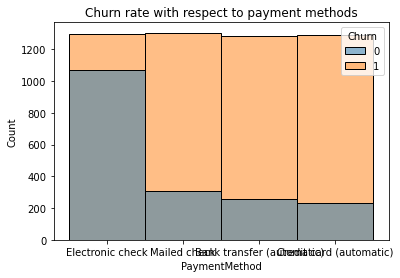

<Figure size 720x360 with 0 Axes>

In [20]:
sns.histplot(data= data, x="PaymentMethod", hue="Churn")
plt.title("Churn rate with respect to payment methods")
plt.figure(figsize=(10,5))
plt.show()

Observations: Customers who use electronic checks as payment method churned more than customers using other payment methods. Customers using automatic credit cards churned least

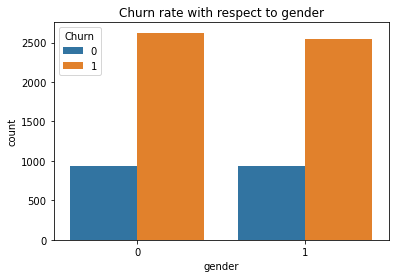

<Figure size 864x576 with 0 Axes>

In [21]:
#churn rate by gender
sns.countplot(data= data, x="gender", hue="Churn")
plt.title("Churn rate with respect to gender")
plt.figure(figsize=(12,8))
plt.show()

Observations: There are more male  customers than females but churn rate for females is slightly higher than males.

To test my hypothesis on whether techsupport for females influences their retention or churn rate more than males, I dig further to find out and visualize tech support for gender versus churn rate

Text(0.5, 1.0, 'Churn rate with respect to Tech Support for gender')

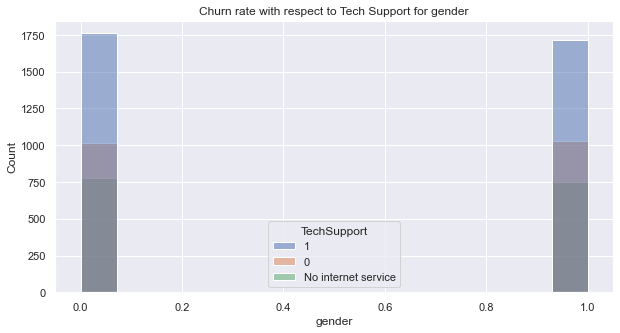

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data= data, x="gender", hue="TechSupport")
plt.title("Churn rate with respect to Tech Support for gender")

Hypothesis: more male customers recieved TechSupport than female customers possibly accounting for their relatively higher retention rates. Thus my hypothesis that TechSupport positively influences female customers not to churn is true and not rejected

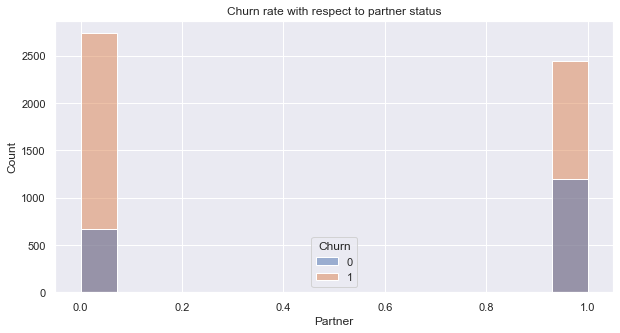

<Figure size 864x576 with 0 Axes>

In [23]:
#churn rate by partner and dependents status
sns.histplot(data= data, x="Partner", hue="Churn")
plt.title("Churn rate with respect to partner status")
plt.figure(figsize=(12,8))
plt.show()

Observation: customers with partners churn at a lesser rate than customers without partners

1.5.2 Checking Distribution for Numerical Columns: Monthly and Total charges as well as Tenure

<AxesSubplot:xlabel='TotalCharges'>

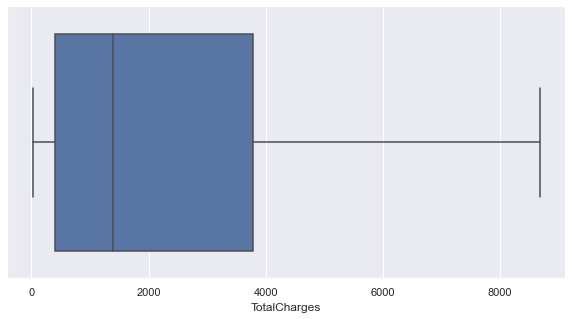

In [24]:
#visualizing total charges distribution
sns.set(rc ={'figure.figsize':(10,5)})
sns.boxplot(data['TotalCharges'])

<AxesSubplot:xlabel='MonthlyCharges'>

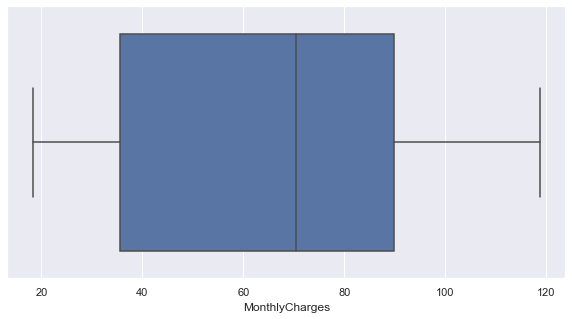

In [25]:
#visualizing monthly charges distribution
sns.set(rc ={'figure.figsize':(10,5)})
sns.boxplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='tenure'>

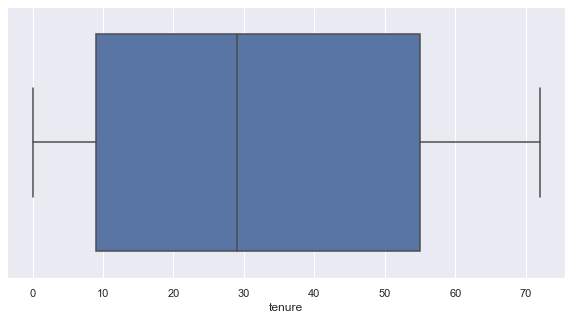

In [26]:
    #visualizing tenure distribution
sns.set(rc ={'figure.figsize':(10,5)})
sns.boxplot(data['tenure'])

Observations: churn rate was more as total charges increased but with monthly charges, increases did not significantly impact churn rate as seen by the distribution. Also with regards to tenure, the distribution of customers who churned most fell below the median indicating possibly that these might be fairly new customers or subscribers to the Telco service.

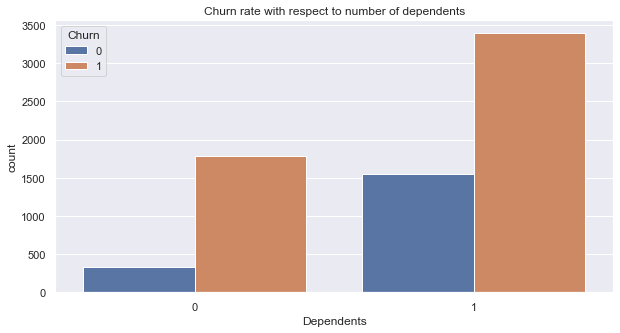

<Figure size 720x360 with 0 Axes>

In [27]:
#churn rate by number of dependents
sns.countplot(data= data, x="Dependents", hue="Churn")
plt.title("Churn rate with respect to number of dependents")
plt.figure(figsize=(10,5))
plt.show()

Observation: Customers without dependents churn more than customers with dependents

1.5.3.**Question 2: which Internet service customers churn the most?

In [28]:
#internet service users
Internet = data['InternetService']. value_counts()
Internet_customers =pd.DataFrame(Internet)
Internet_customers =Internet_customers.reset_index()
Internet_customers.columns =['InternetService','Total']
Internet_customers

,InternetService,Total
0,Fiber optic,3096
1,DSL,2421
2,No,1526


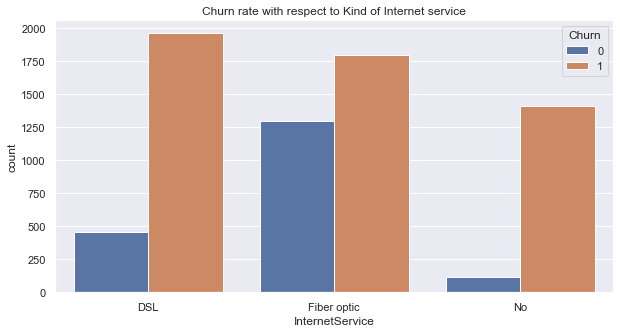

<Figure size 720x360 with 0 Axes>

In [29]:
#visualizing which internet service customers churn the most
sns.countplot(data= data, x="InternetService", hue="Churn")
plt.title("Churn rate with respect to Kind of Internet service")
plt.figure(figsize=(10,5))
plt.show()

Observations: the table above indicates that most of the customers using internet service fall under the fiber optics category with a total of 3096 customers representing ....% of the whole. However from the plot they also are the category that churns most. To dig further, we try to find out if tech support has any influence on the churn rate trends depicted for fiber optic internet service users

Text(0.5, 1.0, 'Churn rate with respect to Tech Support for Kind of Internet service')

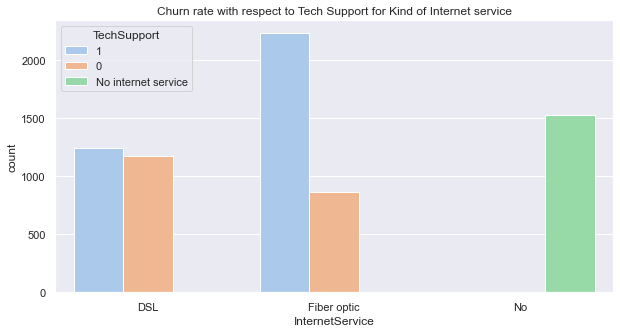

In [30]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data= data, x="InternetService", hue="TechSupport", palette ="pastel")
plt.title("Churn rate with respect to Tech Support for Kind of Internet service")

Observation: Customers using Fibre optic internet service did not receive tech support as much as customers using DSL internet service. A possible reason for the high churn rate amongst Fibre optic internet users as depicted earlier.

1.5.4.**Question 3: Does monthly charges influence churn rate by citizenship?

Text(0.5, 1.0, 'Churn rate with respect to Charges')

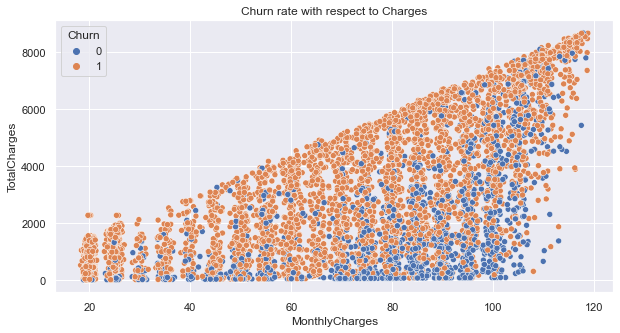

In [31]:
#  general preview 0f relationship between charges(total/monthly) and churn rate
sns.scatterplot(data =data, y='TotalCharges', x='MonthlyCharges', hue='Churn')
plt.title("Churn rate with respect to Charges")

Observation: There's a positive relationship between charges and churn rate. As charges increase(monthly/ Total), churnrate increases in proportion.

Text(0.5, 1.0, 'Churn rate with respect to Citizenship')

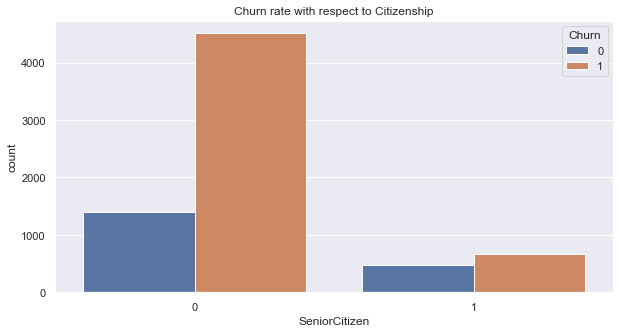

In [32]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data= data, x="SeniorCitizen", hue="Churn")
plt.title("Churn rate with respect to Citizenship")

Observation: Non SeniorCitizens churned more than their counterpart Senior citizens

Text(0.5, 1.0, 'Churn rate with respect to  Citizenship based on TechSupport')

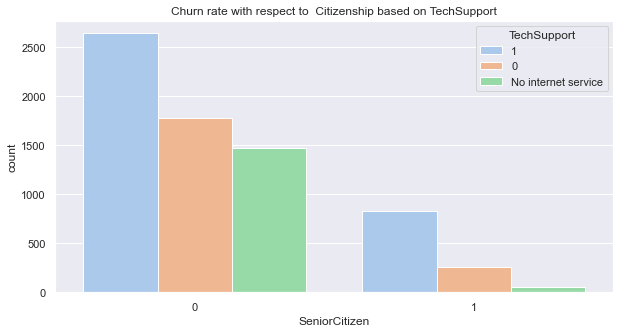

In [33]:
#visualizing if tech support had any influence on churn rate of seniorcitizens
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data= data, x="SeniorCitizen", hue="TechSupport", palette ="pastel")
plt.title("Churn rate with respect to  Citizenship based on TechSupport")

Observation: Non Senior Citizens received TechSupport more than senior citizens but that did not positively influence their churn rate since they still churned the most. 

**Hypothesis:Therefore, my hypothesis that Tech support for customers reduces churn rate for categories such as senior citizens is wrong and should be rejected.

Text(0.5, 1.0, 'Monthly charges on Citizenship Churn')

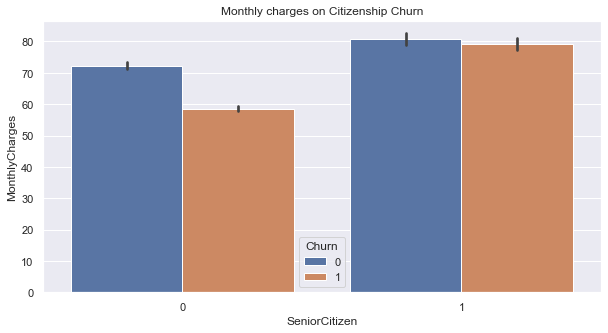

In [34]:
#visualizing effect of  monthly charges on Citizenship churn
sns.barplot(data=data, x="SeniorCitizen", y="MonthlyCharges", hue ="Churn")
plt.title("Monthly charges on Citizenship Churn")

Observation: Churn rates are higher for senior citizens when monthly charges go up and in comparison with non senior citizens the same is true but at a higher level.

1.5.5.**Question 4:Does Monthly Charges influence churn rate of customers with paperless billing or not

Text(0.5, 1.0, 'Churn rate with respect to Charges Vrs PaperlessBilling')

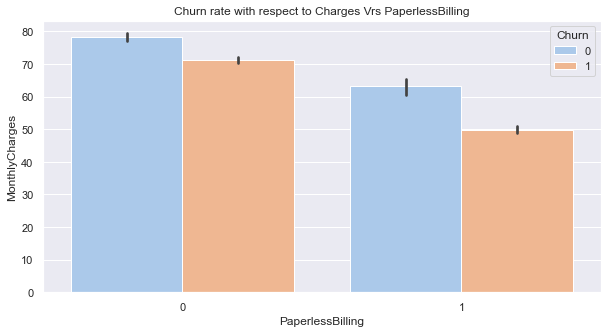

In [35]:
sns.barplot(data =data, y='MonthlyCharges', x='PaperlessBilling',hue ='Churn', palette = 'pastel')
plt.title("Churn rate with respect to Charges Vrs PaperlessBilling")

Observation: Paperless billing customers churned more as monthly charges increase

1.6.**Feature Engineering and Preprocessing

In [36]:
data.nunique()



gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [37]:
#One hot encoding categorical data
data = pd.get_dummies(data= data, columns=['MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,1,0,29.85,29.85,1,...,0,1,0,1,0,0,0,0,1,0
1,0,0,1,1,34,0,1,56.95,1889.50,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,1,1,2,0,0,53.85,108.15,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,1,1,45,1,1,42.30,1840.75,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,1,1,2,0,0,70.70,151.65,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,24,0,0,84.80,1990.50,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,0,0,72,0,0,103.20,7362.90,1,...,1,0,0,0,1,0,0,1,0,0
7040,1,0,0,0,11,1,0,29.60,346.45,1,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,0,1,4,0,0,74.40,306.60,0,...,0,1,0,1,0,0,0,0,0,1


1.6.1.Split data into Predictor and Response Variable

In [38]:
# Separate input features and target
X= data.drop(['Churn'], axis=1, inplace =False)

# Select Target
y = data['Churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (5282, 40)
Shape of testing feature: (1761, 40)
Shape of training label: (5282,)
Shape of training label: (1761,)


1.6.2 Normalization

In [40]:
#Normalization
scaler = MinMaxScaler()

In [41]:
data_transform =['tenure', 'MonthlyCharges', 'TotalCharges']

In [42]:
data[data_transform]=scaler.fit_transform(data[data_transform])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0.013889,1,0,0.115423,0.001275,1,...,0,1,0,1,0,0,0,0,1,0
1,0,0,1,1,0.472222,0,1,0.385075,0.215867,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,1,1,0.027778,0,0,0.354229,0.010310,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,1,1,0.625000,1,1,0.239303,0.210241,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,1,1,0.027778,0,0,0.521891,0.015330,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0.333333,0,0,0.662189,0.227521,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,0,0,1.000000,0,0,0.845274,0.847461,1,...,1,0,0,0,1,0,0,1,0,0
7040,1,0,0,0,0.152778,1,0,0.112935,0.037809,1,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,0,1,0.055556,0,0,0.558706,0.033210,0,...,0,1,0,1,0,0,0,0,0,1


In [43]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.516967,0.700412,0.449599,0.096834,0.407781,0.462803,0.261309,0.734630,...,0.387903,0.395428,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.491457,0.299403,0.261366,0.441561,...,0.487307,0.488977,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.171642,0.044245,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.402778,0.000000,0.000000,0.518408,0.159445,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.763889,0.000000,1.000000,0.712438,0.434780,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1.6.3.Check for Class Imbalance

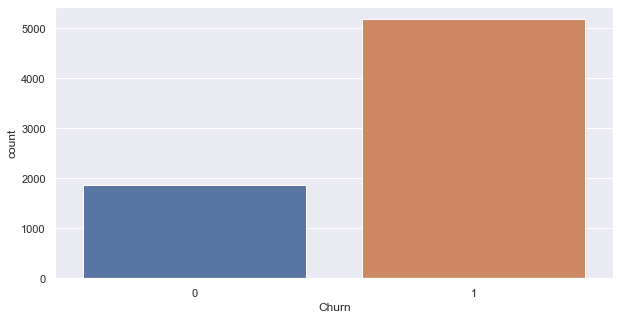

In [44]:
labels =['Churn','No_Churn']
sns.color_palette()
sns.countplot(data.Churn)
sns.set(rc={'figure.figsize':(8,8)})

1.6.4.Perform SMOTE Sampling

In [45]:
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
np.unique(y_train, return_counts =True)

(array([0, 1], dtype=int64), array([3900, 3900], dtype=int64))

1.6.5. Model Building with (SMOTE) Balancing

1.Decision Tree

In [46]:
#joining the trainset for modelling
train_set = X_train.join(y_train, on = X_train.index)
train_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,1,0,1,0,1,59.20,59.2,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,1,1,29,0,0,58.75,1696.2,1,...,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,72,1,1,65.50,4919.7,0,...,0,0,0,0,1,1,0,0,0,1
3,1,0,1,1,23,0,0,20.30,470.6,1,...,0,1,1,0,0,1,0,0,0,1
4,1,0,0,1,72,0,0,92.40,6786.1,0,...,0,0,0,0,1,0,0,1,0,1


In [47]:
#joining the testset for modelling
test_set = X_test.join(y_test, on = X_test.index)
test_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
4903,1,0,1,1,5,0,0,90.80,455.50,0,...,1,0,1,0,0,0,0,1,0,0
2695,0,0,0,1,52,0,0,81.40,4354.45,0,...,0,0,0,1,0,0,1,0,0,1
2184,1,1,1,1,2,0,0,88.55,179.25,0,...,0,0,1,0,0,0,0,1,0,0
6024,1,0,0,1,3,0,0,91.50,242.95,0,...,0,0,1,0,0,0,1,0,0,0
5861,0,0,1,1,35,0,1,19.25,677.90,1,...,0,1,0,0,1,0,0,0,1,1


In [48]:
# Separate input features and target
X= train_set.drop(['Churn'], axis=1, inplace =False)

# Select Target
y = train_set['Churn']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


In [50]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred= dt.predict(X_test)

In [52]:
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['Decision Tree',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Decision Tree  0.808718   0.832988  0.791133  0.811521  0.799164


In [53]:
dtree = DecisionTreeClassifier(max_depth =10, random_state = 101, max_features= None, min_samples_leaf = 15)
dtree_smote =dtree.fit(X_train, y_train)

In [54]:
dtree_pred = dtree_smote.predict(X_test)
dtree_true = y_test

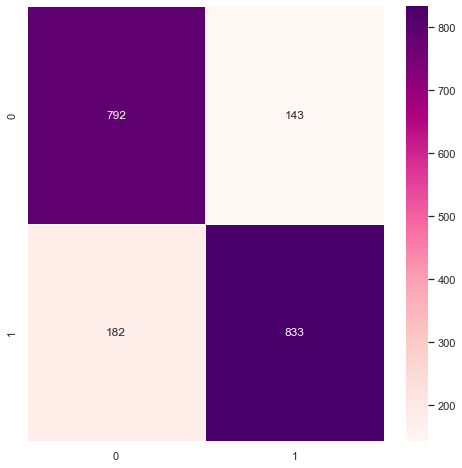

In [55]:
#visualizing Confusion Matrix
cm_dtree = confusion_matrix(dtree_true, dtree_pred)
f,ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm_dtree, annot =True, linewidth =0.5, fmt=".0f",cmap ='RdPu', ax =ax)
plt.xlabel = ('dtree_pred')
plt.ylabel =('dtree_true')
plt.show()

In [56]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Feature Importances:',dt.feature_importances_)



Feature Importances: [1.76299227e-02 1.57756275e-02 1.03230683e-02 1.52053909e-02
 8.16483438e-02 2.59644436e-03 5.06031040e-02 1.27293445e-01
 1.24643794e-01 1.07465241e-02 1.16593295e-03 9.69452913e-03
 6.85107333e-03 5.89152020e-03 0.00000000e+00 2.19928320e-02
 4.14118155e-03 2.90567036e-05 5.43103236e-03 0.00000000e+00
 1.11794481e-02 5.67985912e-03 7.57478281e-03 0.00000000e+00
 3.04146266e-02 2.55030379e-03 0.00000000e+00 4.76024060e-03
 7.44223096e-03 1.28226880e-02 8.10170950e-03 9.67763793e-03
 1.00818908e-03 1.82848265e-01 1.04228868e-01 4.00024130e-02
 1.50408219e-02 1.71072626e-02 1.37335675e-02 1.41642629e-02]


Text(0.5, 1.0, 'Feature Importance')

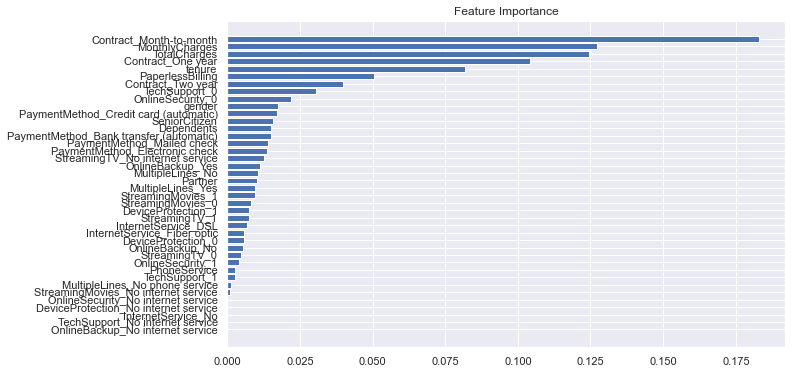

In [57]:
#plot feature importance

feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


2.Logistic Regression 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [59]:
#predicting test results and calculating accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1133
           1       0.85      0.79      0.82      1207

    accuracy                           0.82      2340
   macro avg       0.82      0.82      0.82      2340
weighted avg       0.82      0.82      0.82      2340



3.Gradient Boosting

In [61]:
xgc =xgb.XGBClassifier(n_estimators = 500, max_depth =5, random_state =42)
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [62]:
#predicting the testset results
y_pred =xgc.predict(X_test)

In [63]:
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['XGBClassifier',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  XGBClassifier  0.831624   0.840738  0.830986  0.835833  0.832918


4.Support Vector Machines

In [64]:
SVC =SVC(kernel ='rbf')
SVC.fit(X_train,y_train)

SVC()

In [65]:
#predicting the testset results
y_pred =SVC.predict(X_test)

In [66]:
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['SVC',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

  Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0   SVC  0.641026   0.641699  0.688484  0.664269  0.678589


5.Random Forest


In [67]:
rf_clf = RandomForestClassifier()   
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
#predicting the testset results
y_pred =rf_clf.predict(X_test)

In [69]:
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)


           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Random Forest  0.849145    0.87066  0.830986   0.85036  0.838629


1.6.7.Summarizing the performance of models

Observations: From the five models(SMOTE) performed to train the model, the Random Forest and Xgboost models have the highest F1 score of 85.2% and 82.5% respectivelyand since higher F1 scores are generally better, we go ahead to do some iterations to choose the best model.

1.6.8.** Iteration using Important Features

In [70]:
# evaluating model by using important features
# first visualize important features
xgc =xgb.XGBClassifier(random_state =42)
xgc.fit(X_train, y_train)
print('Feature Importances:',xgc.feature_importances_)

Feature Importances: [0.00390246 0.00548948 0.0042281  0.00314573 0.01006642 0.02047577
 0.02420156 0.00469362 0.0043467  0.01990519 0.         0.01350805
 0.03418499 0.09706294 0.03722137 0.01445039 0.01035724 0.
 0.01169112 0.         0.01420394 0.00673506 0.00545864 0.
 0.01876104 0.01313043 0.         0.00638323 0.00716402 0.
 0.00812934 0.00817071 0.         0.22317994 0.1990236  0.10151263
 0.01541373 0.02647745 0.00921626 0.0181088 ]


Text(0.5, 1.0, 'Feature Importance')

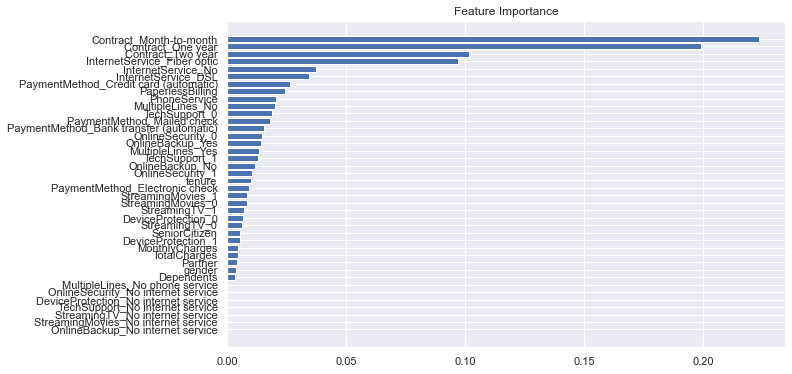

In [71]:
#plot feature importance
feature_importance = xgc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [72]:
selection=SelectFromModel(xgc)
selection.fit(X_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        callbacks=None, colsample_bylevel=1,
                                        colsample_bynode=1, colsample_bytree=1,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=0, gpu_id=-1,
                                        grow_policy='depthwise',
                                        importance_type=None,
                                        interaction_constraints='',
                                        learning_rate=0.300000012, max_bin=256,
                                        max_cat_threshold=64,
                                        max_cat_to_onehot=4, max_delta_step=0,
                                        max_depth=6, max_leaves=0,
                                        min_child_weight=1, missing=nan,
                                        monotone_constraints='()',
                                        n_estimators=100, n_jobs=0,
                                        num_parallel_tree=1, predictor='auto',
                                        random_state=42, ...))

In [73]:
# transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

#train model
xgc.fit(select_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [74]:
#predicting test results
y_pred = xgc.predict(select_X_test)

#evaluating the model
xgc_acc=accuracy_score(y_test,y_pred)
xgc_fscore = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)

print('Limited Features XGBoost Model Accuracy:', xgc_acc)
print('Limited Features XGBoost Model F1 Score:', xgc_fscore)
print('Limited Features XGBoost Model F2 Score:', f2)

Limited Features XGBoost Model Accuracy: 0.7713675213675214
Limited Features XGBoost Model F1 Score: 0.7571493418066273
Limited Features XGBoost Model F2 Score: 0.7160027472527472


In [75]:

selection=SelectFromModel(rf_clf)
selection.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [76]:
# transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

#train model
rf_clf.fit(select_X_train, y_train)

RandomForestClassifier()

In [77]:
#predicting test results
y_pred = rf_clf.predict(select_X_test)

#evaluating the model
rf_clf_acc=accuracy_score(y_test,y_pred)
rf_clf_fscore = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)

print('Limited Features RandomForest Model Accuracy:', rf_clf_acc)
print('Limited Features RandomForest Model F1 Score:', rf_clf_fscore)
print('Limited Features RandomForest Model F2 Score:', f2)

Limited Features RandomForest Model Accuracy: 0.826068376068376
Limited Features RandomForest Model F1 Score: 0.8279069767441861
Limited Features RandomForest Model F2 Score: 0.8177413965920481


Notes: the first model without the limited features for both XGBoost and RandomForest models perform better that with limited features therefore we stick to the first models

2.0. **Model Buidling without Smote Balancing

In [78]:
# Separate input features and target
wsb_X= train_set.drop(['Churn'], axis=1, inplace =False)

# Select Target
wsb_y = train_set['Churn']

wsb_X_train, wsb_X_test, wsb_y_train, wsb_y_test = train_test_split(wsb_X, wsb_y, test_size=0.25, random_state=27)

i.Decision Tree Model

In [79]:
dt =DecisionTreeClassifier()
dt.fit(wsb_X_train, wsb_y_train)
wsb_y_pred= dt.predict(wsb_X_test)
# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
dt_results_wsb = pd.DataFrame([['Decision Tree',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(dt_results_wsb)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Decision Tree  0.804615   0.824795  0.793103  0.808639  0.799245


ii.Logistic Regression Model

In [80]:
wsb_X_train, wsb_X_test, wsb_y_train, wsb_y_test = train_test_split(wsb_X, wsb_y, test_size=0.3, random_state=27)
logreg = LogisticRegression()
logreg.fit(wsb_X_train, wsb_y_train)

LogisticRegression()

In [81]:
#predicting test results and calculating accuracy
wsb_y_pred = logreg.predict(wsb_X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(wsb_X_test, wsb_y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [82]:
print(classification_report(wsb_y_test, wsb_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1154
           1       0.86      0.81      0.83      1186

    accuracy                           0.84      2340
   macro avg       0.84      0.84      0.84      2340
weighted avg       0.84      0.84      0.84      2340



iii.  Gradient Boosting

In [83]:
xgc =xgb.XGBClassifier(n_estimators = 500, max_depth =5, random_state =42)
xgc.fit(wsb_X_train, wsb_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [84]:
#predicting the testset results
wsb_y_pred =xgc.predict(wsb_X_test)

# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
wsb_results2 = pd.DataFrame([['XGBClassifier',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(wsb_results2)

           Model  Accuracy  Presicion   Recall  F1 Score  F2 Score
0  XGBClassifier  0.846581    0.83977  0.86172  0.850603  0.857239


iv. Random Classifier Model

In [85]:
rf_clf = RandomForestClassifier()   
rf_clf.fit(wsb_X_train, wsb_y_train)

RandomForestClassifier()

In [86]:
#predicting the testset results
wsb_y_pred =rf_clf.predict(wsb_X_test)
# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
wsb_results3 = pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(wsb_results3)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Random Forest  0.857265   0.858586  0.860034  0.859309  0.859744


In [87]:
#for randomforestclassifier (SMOTE)
rf_cl =RandomForestClassifier(n_estimators =33)
rf_cl.fit(X_train, y_train)
#predicting test results
y_pred = rf_cl.predict(X_test)
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Random Forest  0.850855   0.865417  0.841756  0.853423  0.846385


In [88]:
#for randomforestclassifier ( Without SMOTE)
rf_cl =RandomForestClassifier(n_estimators =33)
rf_cl.fit(wsb_X_train, wsb_y_train)
#predicting the testset results
wsb_y_pred =rf_clf.predict(wsb_X_test)
# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
wsb_results= pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(wsb_results)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Random Forest  0.857265   0.858586  0.860034  0.859309  0.859744


In [89]:
#for XGBClassifier(SMOTE)
xgc =xgb.XGBClassifier(n_estimators =500,max_depths =5, random_state=42)
xgc.fit(X_train, y_train)
#predicting test results
y_pred = xgc.predict(X_test)
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['XGBClassifier',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

[01:39:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  XGBClassifier  0.832906   0.842857  0.830986  0.836879  0.833333


In [90]:
#for XGBClassifier(Without SMOTE)
xgc =xgb.XGBClassifier(n_estimators =500,max_depths =5, random_state=42)
xgc.fit(wsb_X_train, wsb_y_train)

#predicting the testset results
wsb_y_pred =xgc.predict(wsb_X_test)

# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
wsb_results2 = pd.DataFrame([['XGBClassifier',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(wsb_results2)

[01:40:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  XGBClassifier  0.844872   0.839242  0.858347  0.848687  0.854457


4.0.**Evaluate Chosen model

4.1.Cross Validation and Hyperparameter Tuning

since XGboost and Random Forest Models without Smote perform better than models with smote, we perform cross validation and hyperparameter tuning on the selected without SMOTE models

In [91]:
accuracy_score(wsb_y_test, wsb_y_pred)

0.8448717948717949

In [92]:
#model on which to use CV without SMOTE
xgc =xgb.XGBClassifier(n_estimators =500, random_state =42)
#define cross-validation method
kfold =KFold(n_splits=5) 
#evaluate model
results =cross_val_score(xgc, wsb_X_train, wsb_y_train, cv=kfold)

scores = cross_val_score(xgc, wsb_X_train,wsb_y_train, cv=kfold, n_jobs=-1)
print(scores.mean())

0.8371794871794872


In [93]:
#model on which to use CV with SMOTE
xgc =xgb.XGBClassifier(n_estimators =500, random_state =42)
#define cross-validation method
kfold =KFold(n_splits=5) 
#evaluate model
results =cross_val_score(xgc, X_train, y_train, cv=kfold)

scores = cross_val_score(xgc, X_train,y_train, cv=kfold, n_jobs=-1)
print(scores.mean())

0.845970695970696


In [94]:
#model on which to use CV without Smote
rf_cl =RandomForestClassifier(n_estimators =500, random_state =42)
#define cross-validation method
kfold =KFold(n_splits=5) 
#evaluate model
results =cross_val_score(rf_cl, wsb_X_train, wsb_y_train, cv=kfold)

scores = cross_val_score(rf_cl, wsb_X_train,wsb_y_train, cv=kfold, n_jobs=-1)
print(scores.mean())

0.8507326007326007


In [95]:
#model on which to use CV with Smote
rf_cl =RandomForestClassifier(n_estimators =500, random_state =42)
#define cross-validation method
kfold =KFold(n_splits=5) 
#evaluate model
results =cross_val_score(rf_cl, X_train, y_train, cv=kfold)

scores = cross_val_score(rf_cl, X_train,y_train, cv=kfold, n_jobs=-1)
print(scores.mean())

0.8553113553113553


with cross validation, we note that the RandomClassifier model with Smote performs slightly better than Xgboost. From results, on average, we expect the XGboost model to be able to predict unkown data accurately at 84.5% while RandomForest is expected to predict at 85.53%

Conversely, cross validation on Random Classifier model without Smote is 85.07% and that of XGBoost model 83.7% which are both comparatively lower than the former though in the same range. Thus we do Hyperparameter tuning only for Models with Smote.

In [96]:
#Hyperparameter(Grid Search Method) tuning for Random Forest Classifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
{ 'n_estimators':np.arange(5,100,5), 'max_features':np.arange(0.1,1.0,0.05), }
,cv=5,verbose=1,n_jobs=-1 ) 
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             verbose=1)

In [97]:
grid_search.best_params_

{'max_features': 0.15000000000000002, 'n_estimators': 90}

In [98]:
grid_search.best_score_

0.8569597069597069

In [99]:
#Hyperparameter(Grid Search Method) tuning for XGB Classifier
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), 
{ 'n_estimators':np.arange(5,100,5), 'max_features':np.arange(0.1,1.0,0.05), }
,cv=5, verbose=1,n_jobs=-1 ) 
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
[02:15:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             verbose=1)

In [100]:
grid_search.best_params_

{'max_features': 0.1, 'n_estimators': 35}

In [101]:
grid_search.best_score_

0.8589743589743591

Model's best score for Random Classifier and XGB is  0.8569 and 0.8589 respectively using GridSearch method

In [102]:
# Hyperparameter tuning (Randomized search method)n forXGBClassifier
random_search = RandomizedSearchCV(xgb.XGBClassifier(random_state=42), 
{ 'n_estimators':np.arange(5,100,5), 'max_features':np.arange(0.1,1.0,0.05), }
,cv=5, verbose=1,n_jobs=-1, n_iter=50, random_state = 0 ) 
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[02:18:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, verbose=1)

In [103]:
random_search.best_params_

{'n_estimators': 35, 'max_features': 0.1}

In [104]:
random_search.best_score_

0.8589743589743591

In [105]:
# Hyperparameter tuning (Randomized search method) for RandomForest Classifier
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
{ 'n_estimators':np.arange(5,100,5), 'max_features':np.arange(0.1,1.0,0.05), }
,cv=5,verbose=1,n_jobs=-1, n_iter=50, random_state = 0 ) 
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, verbose=1)

In [106]:
random_search.best_params_

{'n_estimators': 95, 'max_features': 0.15000000000000002}

In [107]:
random_search.best_score_

0.8558608058608058

models best score for Randomclassifier model is 0.8558 and Model's best score for XGBClassifier is 0.8589 using Randomsearch Method

From both the Gridsearch and Randomized search,XGBoost model still performs a little higher  than Randomclassifier model and so we settle on XGBoost to build an optimized version of the model using the combination of hyperparameters  from the Randomizedsearch method.

5.0.**  Future Prediction

In [108]:
#fitting the best model to the train data
best_XGBoost_model =random_search.fit(X_train,y_train)
#predicting the testset results
best_XGBoost_pred =best_XGBoost_model.predict(X_test)
#evaluating the model
print(classification_report(y_test, best_XGBoost_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1133
           1       0.87      0.84      0.85      1207

    accuracy                           0.85      2340
   macro avg       0.85      0.85      0.85      2340
weighted avg       0.85      0.85      0.85      2340



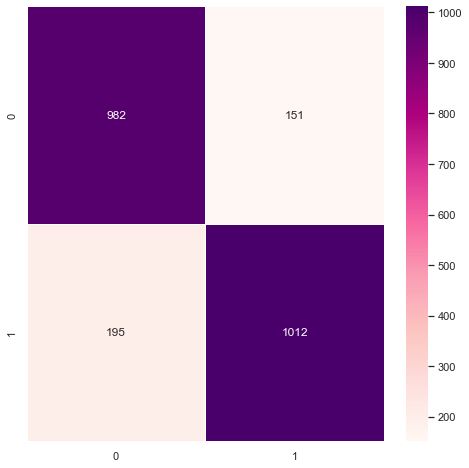

In [109]:
#visualizing Confusion Matrix
cm_best_XGBoost = confusion_matrix(y_test, best_XGBoost_pred)
f,ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm_best_XGBoost, annot =True, linewidth =0.5, fmt=".0f",cmap ='RdPu', ax =ax)
plt.xlabel = ('best_XGBoost_pred')
plt.ylabel =('y_test')
plt.show()

In [110]:
#get final_cv_score
#define cross-validation method
kfold =KFold(n_splits=5) 
final_cv_score =cross_val_score(best_XGBoost_model, X_train, y_train, cv=kfold)

final_cv_score = cross_val_score(best_XGBoost_model, X_train,y_train, cv=kfold, n_jobs=-1)
print(final_cv_score.mean())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.8536630036630036


conclusion: From the scores and confusion matrix above, we see that this version of the model is the best for now with an average cross validation score of 85.36% and F1(0.84). We can expect that this model will reliably predict which customers are likely to churn and inform Vodafone what strategies to implement for customer retention